<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/backtrader-WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install yfinance
!pip install mplfinance
!pip install backtrader

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import base64
import warnings
import logging
import io
from datetime import datetime
from PIL import Image

# backtrader
import backtrader as bt
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
from google.colab import files
# from IPython.display import Image
chart_file = 'result.png'
plt.rcParams['figure.figsize'] = [30, 18]
plt.rcParams.update({'font.size': 18}) 

warnings.filterwarnings('ignore')

baseurl = 'https://af1bbf696a14.ngrok.io';

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

def getChartDataframe(symbol, timeframe, datefrom, dateto):
    url = baseurl + '/chart/' + symbol + '/' + timeframe + '?from=' + encodeUrl(datefrom) + '&to=' + encodeUrl(dateto)
    chartResponse = requests.get(url)
    df = None
    try:
      df = pd.DataFrame(chartResponse.json()['payload'])
      df.tickTime = pd.to_datetime(df.tickTime)
      df = df.set_index('tickTime')
      return df;
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      return;

dummyImg = Image.new('RGB', (60, 30), color = 'black')
dummyImg.save('void.png')

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
cerebro.broker.setcash(1000000.0)
cerebro.addsizer(bt.sizers.PercentSizer, percents = 100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## downtrend 3 up 1 down
q = '\
[d]L.0 < [d]L.1 \n\
AND [d]L.1 > [d]L.2 \n\
AND [d]C.1 > [d]O.1 \n\
AND [d]L.2 > [d]L.3 \n\
AND [d]C.2 > [d]O.2 \n\
AND [d]L.3 > [d]L.4 \n\
AND [d]C.3 > [d]O.3 \n\
AND (\n\
    [d]AVGC10.0 < [d]AVGC20.0 \n\
    AND [d]AVGC20.0 < [d]AVGC50.0 \n\
    AND [d]AVGC20.0 < [d]AVGC20.1 \n\
    AND [d]AVGC50.0 < [d]AVGC100.0 \n\
    AND [d]AVGC50.0 < [d]AVGC50.1 \n\
    AND [d]AVGC100.0 < [d]AVGC200.0 \n\
    AND [d]AVGC100.0 < [d]AVGC100.1 \n\
    AND [d]AVGC100.0 < [d]AVGC200.0 \n\
    AND [d]AVGC200.0 < [d]AVGC200.1 \n\
)\n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.post(baseurl + '/search', data={'q': q})
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  logging.error(f"Exception Name: {type(e).__name__}")
  logging.error(f"Exception Desc: {e}")
  print(r)
  print(r.text)
  raise e

df['patternTime'] = pd.to_datetime(df['patternTime'])
print(df.head)


APP (2022-08-26)
entryPrice: 26.57
tickTime
2022-08-25 11:15:00    26.57
Name: low, dtype: float64


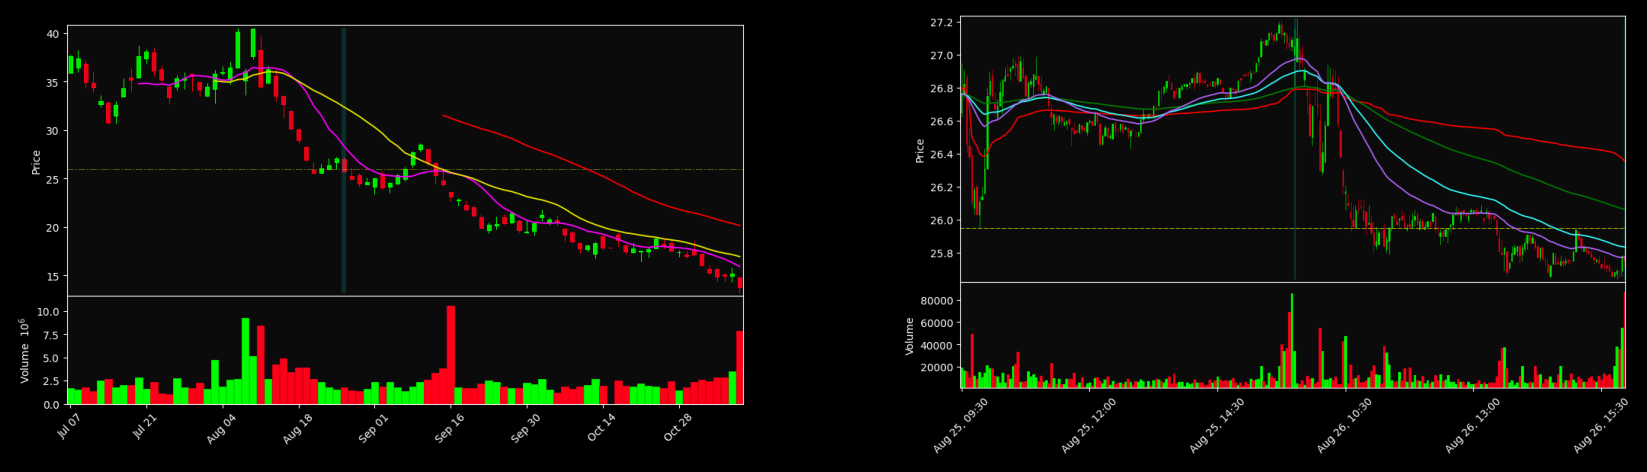

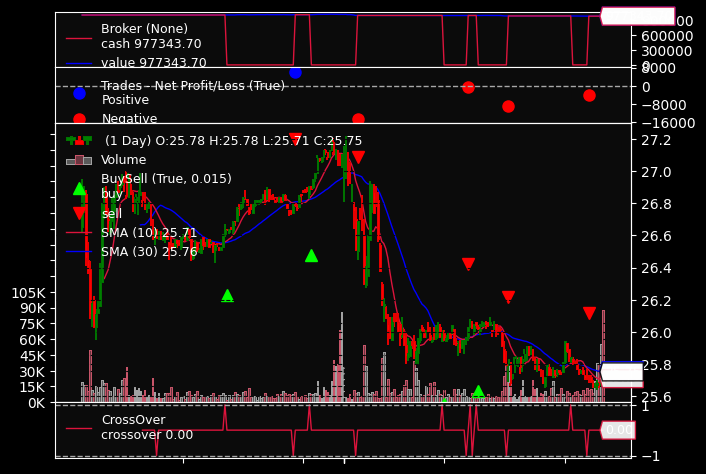

CDNA (2022-08-26)
entryPrice: 21.54
tickTime
2022-08-25 11:15:00    21.54
Name: low, dtype: float64


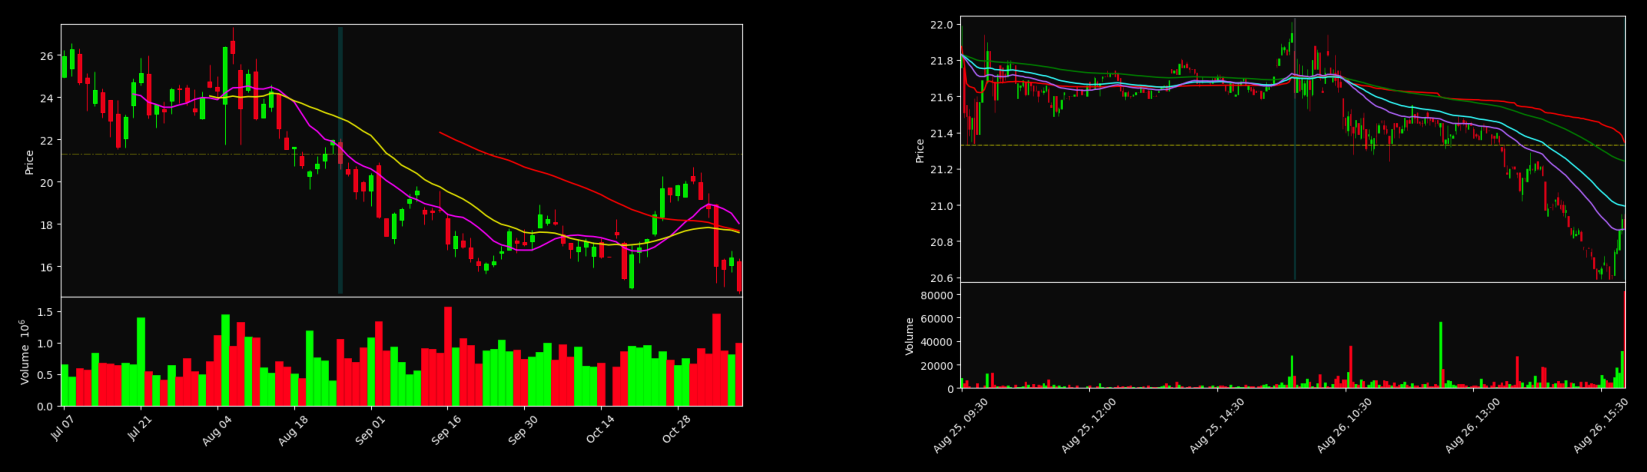

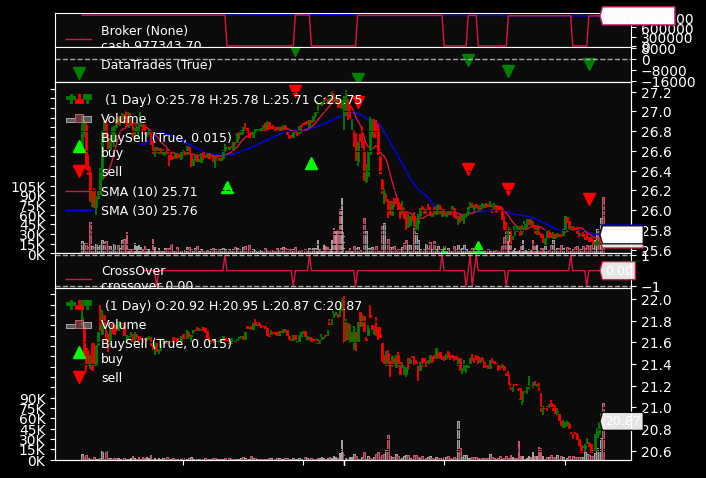

EB (2022-08-26)
entryPrice: 7.76
tickTime
2022-08-25 11:15:00    7.76
Name: low, dtype: float64


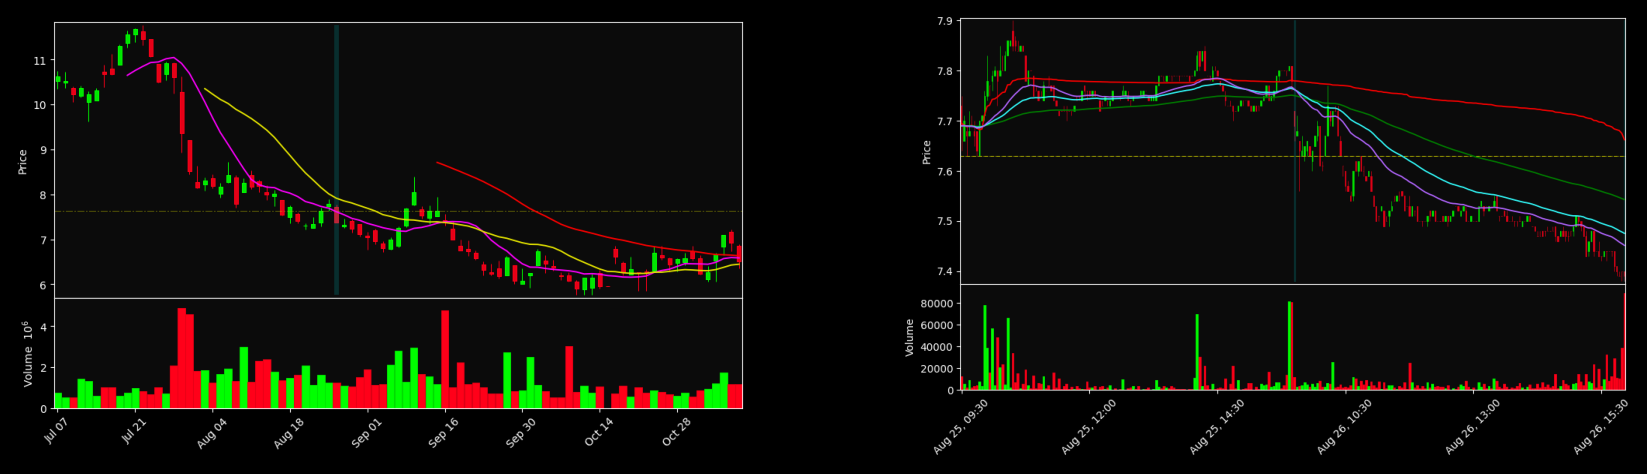

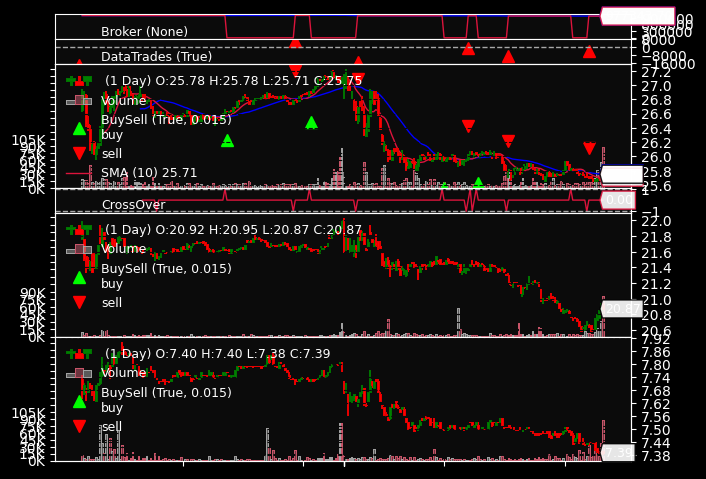

EQX (2022-08-26)
entryPrice: 3.9
tickTime
2022-08-25 11:15:00    3.9
Name: low, dtype: float64


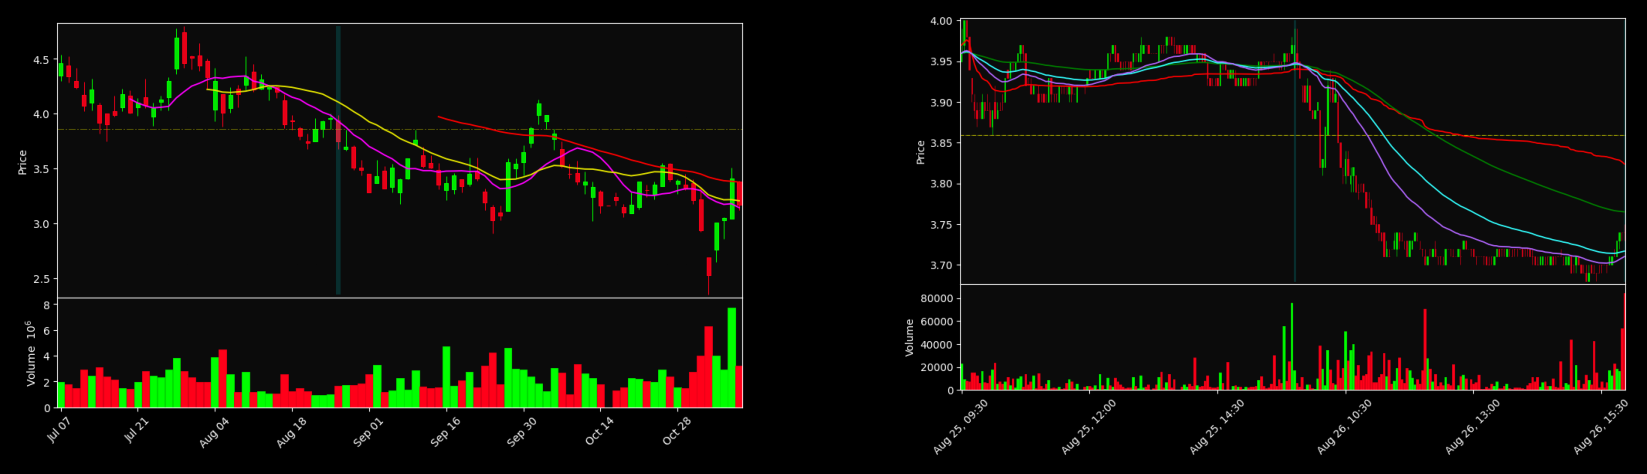

KeyboardInterrupt: ignored

In [21]:
entryOffset = 0
mc = mpf.make_marketcolors(up='#00ff00',down='#ff0019',inherit=True)
mstyledaily  = mpf.make_mpf_style(
    base_mpf_style='nightclouds', 
    mavcolors=['magenta','#e6e600','red','green'],
    marketcolors=mc,
    gridcolor='#0b0b0b'
  )
mstyleintra = mpf.make_mpf_style(
    base_mpf_style='nightclouds', 
    mavcolors=['magenta','#e6e600','red','green'],
    marketcolors=mc,
    gridcolor='#0b0b0b'
  )

for index, row in df.iterrows():
    
    ######################################################
    # fetch daily
    ######################################################
    chartDf = getChartDataframe(
        row['symbol'], 
        'd', 
        (row['patternTime'] + pd.DateOffset(days=-50)).strftime('%Y-%m-%d'), 
        (row['patternTime'] + pd.DateOffset(days=100)).strftime('%Y-%m-%d')
      )

    entryDate = row['patternTime']
    entryStr = entryDate.strftime('%Y-%m-%d')

    idx = chartDf.index.get_loc(entryStr)
    if (entryOffset!=0):
      entryStr = chartDf.iloc[[idx+entryOffset]].index.format()[0]
      entryDate = datetime.strptime(entryStr, '%Y-%m-%d')

    print(row['symbol'] + ' (' + row['patternTime'].strftime('%Y-%m-%d') + ')')

    hlines=(
        chartDf.iloc[[idx+entryOffset-1]]['low'].values[0], 
        # chartDf.iloc[[idx+entryOffset-1]]['high'].values[0]
      )

    addplot = [
        # mpf.make_addplot(chartDf['close'].ewm(span=10, adjust=False).mean(), color='magenta'),
        # mpf.make_addplot(chartDf['close'].ewm(span=21, adjust=False).mean(), color='#e6e600'),
        # mpf.make_addplot(chartDf['close'].ewm(span=50, adjust=False).mean(), color='red'),
        # mpf.make_addplot(chartDf['close'].ewm(span=200,adjust=False).mean(), color='green'),
        # mpf.make_addplot(entryPoint1, scatter=True,  type='scatter', markersize=200, marker=entryMarker, color=entryColor),
        # mpf.make_addplot(entryPoint2, scatter=True,  type='scatter', markersize=50, marker='.', color=entryColor)
    ]

    imgDailyPlot = io.BytesIO()
    mpf.plot(chartDf, 
             type='candle', 
             volume=True, 
             mav=(10,20,50,200),
             tight_layout=True, 
             figratio=(16,9), 
             addplot=addplot,
             savefig=imgDailyPlot,
             style=mstyledaily,
             hlines=dict(hlines=hlines,colors='y',linewidths=1,alpha=0.5,linestyle='-.'),
             vlines=dict(vlines=[entryStr],colors='c',linewidths=4,alpha=0.2))
    _ = imgDailyPlot.seek(0)

    ######################################################
    # fetch intraday
    ######################################################
    start = (entryDate + pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
    end = (entryDate + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    # url = baseurl + '/chart/' + row['symbol'] + '/3m?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)

    imgIntradayPlot = io.BytesIO()

    chartDf = getChartDataframe(
        row['symbol'], 
        '3m', 
        (entryDate + pd.DateOffset(days=-1)).strftime('%Y-%m-%d'), 
        (entryDate + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
      )

    if (chartDf is None):
      imgIntradayPlot = 'void.png'
    else:
      chartDf['VWAP'] = (chartDf.volume * (chartDf.high + chartDf.low) / 2).cumsum() / chartDf.volume.cumsum()

    entryStr = entryDate.replace(hour=9, minute=30)

    entryPrice = chartDf.iloc[[idx+entryOffset-1]]['low'].values[0]
    # entryRow = chartDf.loc[chartDf['high'] >= entryPrice & chartDf['low'] <= entryPrice]

    print('entryPrice: ' + str(entryPrice))
    print(chartDf.iloc[[idx+entryOffset-1]]['low'])

    addplot  = [
      mpf.make_addplot(chartDf['VWAP'], color="red"),
      mpf.make_addplot(chartDf['close'].ewm(span=150, adjust=False).mean(), color='green'),
      mpf.make_addplot(chartDf['close'].ewm(span=63, adjust=False).mean(), color='#33ffff'),
      mpf.make_addplot(chartDf['close'].ewm(span=36, adjust=False).mean(), color='#b266ff'),
    ]

    vlines=[entryDate.replace(hour=9, minute=30), entryDate.replace(hour=15, minute=57)]

    mpf.plot(chartDf[start:end], 
          type='candle', 
          volume=True, 
          tight_layout=True, 
          figratio=(16,9),
          savefig=imgIntradayPlot,
          addplot=addplot,
          style=mstyleintra,
          hlines=dict(hlines=hlines,colors='y',linewidths=(0.5),linestyle='-.'),
          vlines=dict(vlines=vlines,colors='c',linewidths=(2),alpha=0.2))
    _ = imgIntradayPlot.seek(0)

    ######################################################
    # render candlestick & perf charts
    ######################################################
    # daily & intraday charts
    img1 = m_img.imread(imgDailyPlot)
    img2 = m_img.imread(imgIntradayPlot)
    fig = plt.figure(figsize=(21,14))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.show()

    cerebro.adddata(bt.feeds.PandasData(dataname=chartDf))

    cerebro.run()
    # cerebro.plot(style='bar')[0][0].savefig(chart_file, dpi=400)
    # Image(open(chart_file, 'rb').read())
    # cerebro.plot(iplot = False, style='candlestick', barup='green', bardown='red')
